In [45]:
import numpy as np # linear algebra
from keras import models
from keras import layers
from keras.datasets import mnist
from keras import optimizers
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [46]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32') / 255 
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [47]:
temp_X_train = []
for i in range(60000):
    temp_X_train.append(X_train[i].flatten())

temp_X_test = []
for i in range(10000):
    temp_X_test.append(X_test[i].flatten())
    
X_train = np.array(temp_X_train)
X_test = np.array(temp_X_test)

In [53]:
model = models.Sequential() 
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) 
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
optimizer = optimizers.RMSprop()
model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [54]:
history = model.fit(X_train, y_train, epochs=8, batch_size=128, validation_split=0.15)

Train on 51000 samples, validate on 9000 samples
Epoch 1/8
51000/51000 [==============================] - 1s 24us/step - loss: 0.2492 - acc: 0.9222 - val_loss: 0.1302 - val_acc: 0.9590
Epoch 2/8
51000/51000 [==============================] - 1s 19us/step - loss: 0.0923 - acc: 0.9708 - val_loss: 0.1032 - val_acc: 0.9690
Epoch 3/8
51000/51000 [==============================] - 1s 19us/step - loss: 0.0593 - acc: 0.9816 - val_loss: 0.0781 - val_acc: 0.9788
Epoch 4/8
51000/51000 [==============================] - 1s 19us/step - loss: 0.0414 - acc: 0.9866 - val_loss: 0.1050 - val_acc: 0.9711
Epoch 5/8
51000/51000 [==============================] - 1s 19us/step - loss: 0.0304 - acc: 0.9905 - val_loss: 0.0959 - val_acc: 0.9776
Epoch 6/8
51000/51000 [==============================] - 1s 19us/step - loss: 0.0237 - acc: 0.9924 - val_loss: 0.1173 - val_acc: 0.9742
Epoch 7/8
51000/51000 [==============================] - 1s 19us/step - loss: 0.0173 - acc: 0.9945 - val_loss: 0.1023 - val_acc: 0.9787

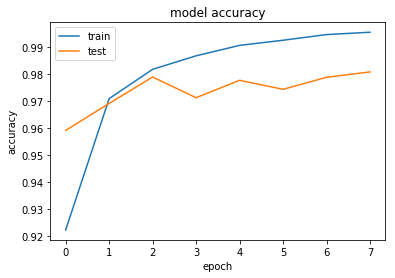

In [55]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

10000/10000 [==============================] - 0s 23us/step
0.9816


In [57]:
from PIL import Image
xtest = []
ytest = []
for s in range(0,10):
    myImage = Image.open("/home/project67/Elad_learning/MNISTpics/" + str(s) + ".bmp");
    myImage = myImage.resize((28,28), Image.ANTIALIAS)
    px = myImage.load()


    L = []
    for i in range(0,28):
        for j in range(0,28):
            L.append((px[j,i]) / 255)

    A = [0,0,0,0,0,0,0,0,0,0]
    A[s] = 1;
    L = np.array(L)
    A = np.array(A)
    xtest.append(L)
    ytest.append(A)
xtest = np.array(xtest)
ytest = np.array(ytest)
print(xtest.shape)
print(ytest.shape)
accuracy = model.evaluate(x=xtest,y=ytest)
print(accuracy[1])

(10, 784)
(10, 10)
10/10 [==============================] - 0s 124us/step
0.8999999761581421
